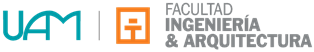
# 🚀 Taller | Funciones de Agregado y Agrupaciones en SQL Server (T-SQL)
**Base de datos: Northwind**


**Nombre:** <mark>\<Franya Dalila Gutiérrez López\></mark>

## 📖 Introducción

Las funciones de agregado permiten realizar cálculos sobre un conjunto de filas y devolver un solo valor. Son útiles para obtener resúmenes de datos, estadísticas o métricas.

**Funciones comunes:**
- `COUNT()` — Cuenta el número de filas
- `SUM()` — Suma los valores de una columna numérica
- `AVG()` — Calcula el promedio
- `MIN()` — Devuelve el valor mínimo
- `MAX()` — Devuelve el valor máximo

`GROUP BY` permite agrupar filas según el valor de una o varias columnas, y aplicar funciones de agregado sobre cada grupo.

`HAVING` permite filtrar grupos (después de agrupar), mientras que `WHERE` filtra filas (antes de agrupar).

## 🧠 Ejercicios propuestos

Cada ejercicio debe resolverse en una celda de código T-SQL.

# 📝 Ejercicio 1

### Mostrar el número de clientes que hay por país.

## Documentación

- Se usa Select para seleccionar las filas a mostrar, en este caso seria:
    - Customers.Country con el alias de Pais (porque ahi se encuentran los paises de los clientes)
    - Count(Customers.CustomersID) con el alias de clienets, pues se contaran cuantos registros de clientes hay en la tabla
- Se usa from para obtener la tabla de donde viene los datos, el origen de los registros. en este caso es de la tabla de Customers con el alias c
- se usa group by para agrupar los registros de los paises como uno solo, asi no se mostrarán datos repetidos
- se ordernan según la cantidad de clientes registrada

In [ ]:
SELECT c.Country AS Pais, COUNT(c.CustomerID) AS Clientes
FROM Customers AS c
GROUP BY Country
ORDER BY Clientes;

# 📝 Ejercicio 2

### Calcular el número total de pedidos realizados en cada año.

## Documentación

- se usa select para seleccionar las columnas a mostrar. en este caso:
    - el año de la fecha del pedido. a esto se le asigna un alias (año) que será mostrado al listar la tabla
    - el contador de ids de los pedidos, con el cual se puede conocer cuantos pedidos hay registrados. tiene alias de TotalPedidos
- se usa from para especificar la tabla origen. en este caso la tabla Orders conalias o
- where para especificar los registros a filtrar, aca se filtrarán todos los datos en los que exista un registro de fecha
- se agrupan por el año de la fecha registrada gracias a group by
- se ordenan por año de forma ascendente (predeterminada) gracias a order by

In [ ]:
SELECT YEAR(o.OrderDate) AS Anio, COUNT(o.OrderID) AS TotalPedidos
FROM Orders as o
WHERE o.OrderDate is not NULL
GROUP BY YEAR(o.OrderDate)
ORDER BY Anio;

# 📝 Ejercicio 3

### Mostrar el precio promedio de los productos por cada categoría.

## Documentación

- se seleccionan las columnas a mostrar:
    - Categories.CategoryName porque contiene el nombre de las categorias. se le asigna el alias Categoria
    - el calculo del promedio del precio unitario de cada producto. se le asigna el alias PrecioPromedio
- se especifica el origen de los datos, en este caso de la tabla de categorias con alias c
- se une la tabla de products con la condicion de emparejamiento de que la llave foranea de categorias (Products.CategoryID) en Products sea igual a la llave primaria de categorias (Categories.CategoryID) en Categories
- se agrupan los registros que contengan el mismo nombre de categoria
- se ordenan los registros por el nombre de la categoria en orden ascendente (por defecto)

In [ ]:
SELECT c.CategoryName AS Categoria, AVG(p.UnitPrice) AS PrecioPromedio   
FROM Categories AS c
JOIN Products AS p ON p.CategoryID = c.CategoryID
GROUP BY c.CategoryName
ORDER BY c.CategoryName;

# 📝 Ejercicio 4

### Obtener el total de ventas por cada empleado (sumando el subtotal de sus pedidos).

## Documentacion

- se seleccionan las columnas a mostras, en este caso son dos
    - La columna de empleado, que es la concatenación del texto que aparece en Employees.FirstName y Employees.LastName, con un espacio de por medio.
    - La columa TotalVentas, que es el calculo hecho de las ventas totales de cada orden en Order Details
- se especifica el origen de los datos, en este caso la tabla de employees
- se unen las tablas relacionadas:
    - Orders, que se relaciona con la llave foranea de EmployeeID
    - Order Details, que se relacion con Orders a través de su llave foranea OrderID
- se agrupan por el empleado, para que la suma del subtotal se calcule por cada empleado 
- se ordenan los resultados para mostrar el mayor dato numerico de primero

In [ ]:
select e.FirstName+' '+e.LastName as Empleado, SUM(od.UnitPrice * od.Quantity * (1 - od.Discount)) AS TotalVentas
from Employees as e
join Orders as o on o.EmployeeID = e.EmployeeID
join [Order Details] as od on od.OrderID = o.OrderID
group by e.EmployeeID, e.FirstName, e.LastName
order by TotalVentas desc;

# 📝 Ejercicio 5

### Mostrar el número de productos distintos que se han vendido en cada pedido.

## Documentacion

- se seleccionan las columnas a mostrar. en este caso, como se solicita mostrar el numero de productos DISTINTOS que se han vendido en cada pedido.
    - o.OrderId para identificar el pedido
    -  <span style="font-family: Consolas, &quot;Courier New&quot;, monospace; font-size: 12px; white-space: pre; color: rgb(220, 220, 170);">COUNT</span><span style="color: rgb(255, 255, 255); font-family: Consolas, &quot;Courier New&quot;, monospace; font-size: 12px; white-space: pre;">(</span><span style="font-family: Consolas, &quot;Courier New&quot;, monospace; font-size: 12px; white-space: pre; color: rgb(86, 156, 214);">DISTINCT</span> <span style="color: rgb(255, 255, 255); font-family: Consolas, &quot;Courier New&quot;, monospace; font-size: 12px; white-space: pre;">od.ProductID) </span> <span style="font-family: Consolas, &quot;Courier New&quot;, monospace; font-size: 12px; white-space: pre; color: rgb(86, 156, 214);">AS</span> <span style="color: rgb(255, 255, 255); font-family: Consolas, &quot;Courier New&quot;, monospace; font-size: 12px; white-space: pre;">ProductosDistintos </span> para contar cuantos productos distintos aparecen en ESE pedid
- <span style="color: var(--vscode-foreground);">se especifica el origen de los datos, en este caso, la tabla de orders&nbsp;</span>  
- <span style="color: var(--vscode-foreground);">se une la taba de Order Details, porque ahi está el detalle de los pedidos, o sea ahi esta desglozada la información del pedido</span>
- <span style="color: var(--vscode-foreground);">se agrupan por OrderID para contar por cada pedido</span>
- <span style="color: var(--vscode-foreground);">se ordenan de mayor a menor segun ProductosDistintos</span>

In [ ]:
SELECT  o.OrderID, COUNT(DISTINCT od.ProductID) AS ProductosDistintos
FROM Orders AS o
JOIN [Order Details] AS od ON od.OrderID = o.OrderID
GROUP BY o.OrderID
ORDER BY ProductosDistintos DESC;

# 📝 Ejercicio 6

### Listar las categorías que han generado más de $50,000 en ventas totales.

## Documentacion

- se seleccionan las columnas que se desean mostrar
    - como Categoria se muestra: el campo de CategoryName de la tabla Categories
    - como TotalVentas: el calculo del subtotal de las ordenes existentes en Order Details
- se especifica el origen de los datos, en este caso: la tabla Categories
- se unen las tablas relacionadas:
    - la tabla Products, que se relaciona a la tabla Categories a través de la llave CategoryID
    - la tabla de Order Details, que se relaciona a la tabla de Products, a través de la llave ProductID
- se agrupan por el nombre de la categoria en el campo de CategoryName de la tabla Categories
- se filtra por el total requerido: 50000
- se ordena la lista mostrada por TotalVentas (el calculo de subtotal) en descendente

In [ ]:
select c.CategoryName as Categoria, SUM(od.UnitPrice * od.Quantity * (1 - od.Discount)) AS TotalVentas
from Categories as c
join Products as p on p.CategoryID = c.CategoryID
join [Order Details] as od on od.ProductID = p.ProductID
group by c.CategoryName
HAVING SUM(od.UnitPrice * od.Quantity * (1 - od.Discount)) > 50000
order by TotalVentas desc;